In [ ]:
Projet :

In [ ]:
Partie 1 : définition des couleurs dans un repère 3D 

In [1]:
# création des couleurs
""" générateur de couleurs pour l'apprentissage avec découpage 
du cube 3d en 9couleurs avec modélisation du conne gris faisant la diagonal entre (0,0,0) et (255,255,255)
"""
from random import randint
#d"finition des limites 
lim_black = [(0,0,0) , (50,50,50)]
lim_white = [(210,210,210) , (255,255,255)]
lim_red = [(60,0,0) , (255,118,118)]
lim_green = [(0,60,0) , (118,255,118)]
lim_blue = [(0,0,60) , (118,118,255)]
lim_pink = [(138,0,138) , (255,200,255)]
lim_cyan = [(0,138,138) , (200,255,255)]
lim_yellow = [(138,138,0) , (255,255,200)]

liste_lim_couleur = [lim_black, lim_white, lim_red,
                     lim_green, lim_blue, lim_pink, lim_cyan, lim_yellow]

labels = ["black", "white", "red", "green", "blue", "pink", "cyan", "yellow","grey"]

def inclu_conne_grey(r,g,b): #diamètre du conne gris : r ~= g ~= b : précision à 10%
    ret = False
    ret = (r > (b-b*0.1))*(r < (b+b*0.1)) * (r > (g-g*0.1))*(r < (g+g*0.1)) * (b > (r-r*0.1))*(b < (r+r*0.1)) * (b > (g-g*0.1))*(b < (g+g*0.1)) * (g > (r-r*0.1))*(g < (r+r*0.1)) * (g > (b-b*0.1))*(g < (b+b*0.1))
    return ret

"""tirage aléatoire r,g,b suivant les limites empiriques 
des couleurs en représentation 3d
N -> donne N tirage pour chacune des couleurs avec possibilité alétoire de gris
N grand conseillé afin d'obtenir des ocurrences du gris pour l'apprentissage
Sortie -> tableau 2lignes N*8 colonnes
avec ligne 0 = couleurs rgb et ligne 1 = label"""
def create_liste_9couleurs(N):
    couleurs_apprenti = [[],[]]
    for n in range(N):
        for i in range(8) :
            nom_couleurs = labels[i]
            r = randint(liste_lim_couleur[i][0][0],liste_lim_couleur[i][1][0])
            g = randint(liste_lim_couleur[i][0][1],liste_lim_couleur[i][1][1])
            b = randint(liste_lim_couleur[i][0][2],liste_lim_couleur[i][1][2])
            if inclu_conne_grey(r,g,b)==1: # test pour le conne gris
                if labels[i]!="white":
                    if labels[i]!="black":
                        nom_couleurs = labels[-1]
            couleurs_apprenti[0].append((r,g,b))
            couleurs_apprenti[1].append(nom_couleurs)
    return(couleurs_apprenti)


In [ ]:
Partie 2 : Apprentissage de MLPCassifier

In [2]:
"""c_app = Color_prime()
    
with open("ref_couleur_auzi.json", "r") as fichier:
    c_app = json.load(fichier, object_hook=deserialiseur_perso)

print(c_app.list_color)   
x = c_app.list_color[:][0]
y = c_app.list_color[:][1]

"""
from sklearn import datasets, metrics

from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import json
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

l = create_liste_9couleurs(1000) # création d'une liste(taille = 9 *1000) de 9 couleurs 
x = l[0] #définition rgb de la couleur
y = l[1] #label de la couleur



clf = MLPClassifier(alpha=1, max_iter=10000)

clf.fit(x, y) # entrainement 


#prediction
t = create_liste_9couleurs(500)
predict_images = t[0]
actual_labels = t[1]
predicted_labels = clf.predict(predict_images)



#classification report
print (metrics.classification_report(actual_labels,predicted_labels))


"""conclusion des tests : 
MLPC performant avec précision = 0.88 pour alpha = 1
les autres sont toujours moins performant"""


             precision    recall  f1-score   support

      black       0.96      1.00      0.98       500
       blue       0.88      0.81      0.84       499
       cyan       0.90      0.76      0.83       492
      green       0.78      0.92      0.85       498
       grey       0.50      0.23      0.32        30
       pink       0.82      0.83      0.83       488
        red       0.91      0.79      0.85       500
      white       0.82      0.98      0.90       500
     yellow       0.85      0.81      0.83       493

avg / total       0.86      0.86      0.86      4000



'conclusion des tests : \nMLPC performant avec précision = 0.88 pour alpha = 1\nles autres sont toujours moins performant'

In [48]:
Base de donnée d'image (création et remplisage)

SyntaxError: invalid syntax (<ipython-input-48-fffaa5307f8e>, line 1)

In [3]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import json

class Img: #classe qui contient l'info pour une image
    def __init__(self):
        name = [] # n chemin de l'image
        prime_color = [] # valeur en pixel de la couleur principale de l'image
        snd_color = []# valeur en pixel de la couleur secondaire de l'image
        tag1 = []# nom de la couleur principale
        tag2 = []# nom de la couleur secondaire
        size = 0 # taile de l'image
        
def serialiseur_p2(obj): #serialiseur adapter a la classe précédente
    if isinstance(obj, Img):
        return {"__class__": "Img",
                "name" : obj.name,
                "size" : obj.size,
                "prime_color": obj.prime_color,
                "snd_color": obj.snd_color,
               "tag1": obj.tag1,
               "tag2": obj.tag2}
    raise TypeError(repr(obj) + " n'est pas sérialisable !")

def deserialiseur_p2(obj_dict):
    if "__class__" in obj_dict:
        if obj_dict["__class__"] == "Img":
            obj = Img()
            obj.name = obj_dict["name"]
            obj.size = obj_dict["size"]
            obj.prime_color = obj_dict["prime_color"]
            obj.snd_color = obj_dict["snd_color"]
            obj.name_c1 = obj_dict["tag1"]
            obj.name_c2 = obj_dict["tag2"]
            return obj
    return obj_dict


def charge_image(liste_image): # fonction pour charger les infos d'une liste d'image dans un fichier json
    liste_c = []
    cluster_count = 20
    global clf

    for name in liste_image: #action par image
        imgfile = Image.open(name) #chargement de l'image numéro 1
        imgfile.load()

        numarray = numpy.array(imgfile.getdata(), numpy.uint8)
# utilisation de minibatchkmeans pour accélérer le temps d'éxecution du traitement des images
        clusters = MiniBatchKMeans(n_clusters = cluster_count)
        clusters.fit(numarray)

        npbins = numpy.arange(0, cluster_count +1)
        histogram = numpy.histogram(clusters.labels_, bins=npbins) #calcul de l'histogramme
        labels = numpy.unique(clusters.labels_)
        histogram2=sorted(histogram[0],reverse=True) #tri de l'histogramme
        
        list_color = []
        list_name=[]
        for i in range(2):
            rgb = (math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])) #on récupère les couleurs moyenne de chaque cluster
            list_color.append(rgb)
            name_c = clf.predict([rgb])
            list_name.append(str(name_c[0]))
        
        c = Img() #on remplit une instance de la classe color_prime
        c.name = name
        c.prime_color = list_color[0]
        c.snd_color = list_color[1]
        c.size = imgfile.size
        c.tag1 = list_name[0]
        c.tag2 = list_name[1]
        liste_c.append(c)
        
    with open('datas.json', 'a') as f: #création du fichier json
        json.dump(liste_c,f,indent = 4, default = serialiseur_p2) #écriture de datas dans le fichier .json


import os.path 
  
def rechercheimage(path):  #recherche tout les fichiers dans le dossier wp 
    fichier=[]  
    for root, dirs, files in os.walk(path):  
        for i in files:  
            fichier.append(os.path.join(root, i))  
    return fichier


liste_image = rechercheimage("wp")
charge_image(liste_image)
# A noter ! Les image coder en gris (1 dimension) ne marche pas ni celle dont le format n'est pas jpg 

wp/120px-Blume_im_Wasser_03.jpg
wp/131px-Bellis_perennis_Madeliefje.jpg
wp/120px-Sommerblumen01.JPG
wp/115px-Copal_Madagascar_-_Fleur.jpg
wp/108px-Mucha-Flower-1897.jpg
wp/112px-Bellis_perennis_Madeliefje.jpg
wp/123px-The_Man_Who_Planted_Trees_4600787479.jpg


In [ ]:
Application utilisateur

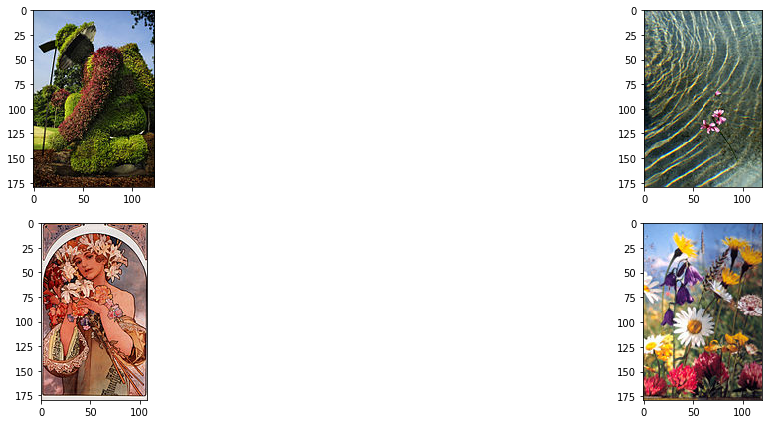

Donner l'image dont vous preferez la couleur ( 1 ou 2 ou...) ou 0 pour un nouveau tirage
1
La couleur principale est green
La couleur secondaire est yellow
Voici des images qui possèdent ces couleurs


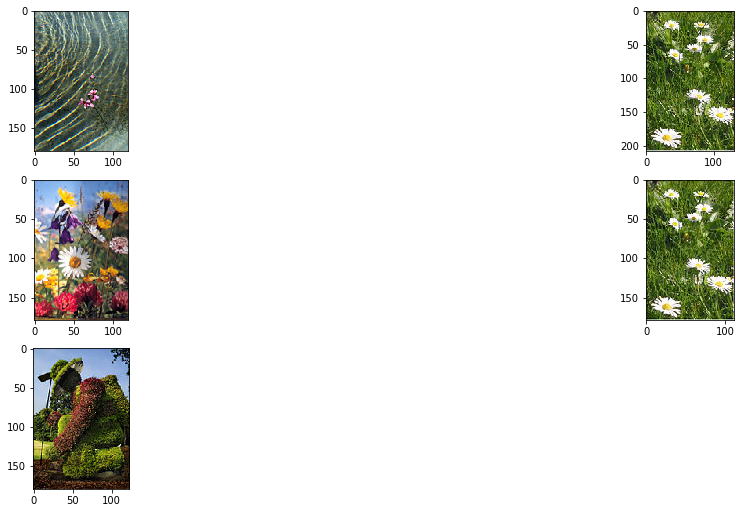

In [33]:
"""Fonctions de chargement du fichier Json contenant les info sur toutes les image de la BD"""
from pandas.io.json import json_normalize
import pandas as pd
import random
import math
import json
from PIL import Image
import matplotlib.pyplot as plt


def charge_datafrom(nameJsonFile):
    data = json.load(open(nameJsonFile)) # chargement du json 
    array = [] #initialisation du table pour la passage dans la dataframe
    for data in data: # boucle pour remplir le le table
        array.append([data['__class__'], data['name'], data['size'], data['prime_color'], data['snd_color'], data['tag1'], data['tag2']])
    dataframe = pd.DataFrame(array, columns=['__class__', 'name','size', 'prime_color', 'snd_color', 'tag1', 'tag2'])
    dataframe = dataframe.astype(dtype= {"__class__" : "<U100", "name" : "<U100","size" : object, "prime_color" : object, "snd_color" : object, "tag1" :"<U100" , "tag2" : "<U100"})
    return(dataframe)

def findByColor(nameColor, dataframe):
#retourn la list des ligne de la dataframe possédant en couleurs principale ou secondaire nameColor
    listName = [] #initialisation de la liste de retour
    # séléction des ligne ou tag1 ou tag2 sont la couleur rechercher
    df = dataframe.loc[(dataframe['tag1'] == nameColor) | (dataframe['tag2'] == nameColor)]
    for n in range(df.shape[0]): # ajout dans une liste des lignes de la dataframe
        listName.append(df.iloc[n])
    return listName

def tirageAleatoireImages(nbr,dataframe): # renvoie une liste de nbr ligne de la dataframe de manière aléatoire
    ret = [] #liste de retour
    list_i = [] # liste des indices dans la datafrùae pour éviter les doublons
    k = 0 # compteur d'image choisi pas le tirage alétoire
    while k < nbr : # boucle pour obtenir le bon compte d'image
        i = random.randrange(0,dataframe.shape[0]) #tirage d'un nombre aléatoire entre 0 et la nombre de ligne de la dataframe
        if not(i in list_i) : # test si l'image n'a pas déj été prise
            k+=1 #incrémentation du compteur
            list_i.append(i) # ajout de l'indice de la ligne dans la liste de controle
            ret.append(dataframe.iloc[i]) # ajout de le ligne dans la liste de retour
    return ret

def aff(list_df): # affiche les images référencées dans la liste de dataframe
    i = 1 #indice pour l'emplacement de l'image dans le subplot
    nbrSubplot_l =math.ceil(len(list_df)) # nombre de ligne pour le subplot
    nbrSubplot_c =2 # nombre de colonne pour le subplot
    fig = plt.gcf() #récupère la référence de la figure qui va être afficher
    fig.set_size_inches(20,15) #dimensionne la figure qui va être afficher
    for nom in list_df:
        im = Image.open(nom['name']) # on récupère le nom de l'image
        plt.subplot(nbrSubplot_l,nbrSubplot_c, i) #positionnement de l'image dans le subplot
        plt.imshow(im) #chargement de l'image dans le plot
        i+= 1
    plt.show() #affichage de toutes les images

def afficheImageForChoix(nbrImg, dataframe): # affiche nbrImg images tirée aléatoirement dans la base de donnée et sans doublet  
    #retourne le numéro de l'image choisi
    list_df = tirageAleatoireImages(nbrImg,dataframe) # liste de donnée dataframe des images tiré aléatoirement
    aff(list_df) # affichage des images contenues dans la list de dataframe
    choice = choix(nbrImg,dataframe) #demande à l'utilisateurs un choix
    return choice

def choix(nbrImg,dataframe): #input pour connaitre l'image préférée
    print('Donner l\'image dont vous preferez la couleur ( 1 ou 2 ou...) ou 0 pour un nouveau tirage')
    i = input()
    return i

def main(dataframe):
    choice = 0 # numero de l'image qui sera choisi : 0 = relancer la séquence de choix
    while choice == 0:
        choice = (int)(afficheImageForChoix(4,dataframe)) # fonction pour le choix
    prime_color = dataframe.iloc[choice]['tag1'] # récupération de la couleurs primaire du l'image choisi
    snd_color = dataframe.iloc[choice]['tag2'] # récupération de la couleurs secondaire du l'image choisi

    
    print('La couleur principale est '+prime_color)
    print('La couleur secondaire est '+snd_color)
    list_prime = findByColor(prime_color, dataframe) # recherche des images possédant le couleur primaire
    list_snd = findByColor(snd_color, dataframe) # recherche des images possédant la couleurs secondaire
    print('Voici des images qui possèdent la couleurs principale')
    aff(list_prime) # affichage des images 
#A voir : il faut limiter la taille de liste pour le temps de chargement des images 
    print('Voici des images qui possèdent la couleurs secondaire')
    aff(list_snd)
    
    
nameJsonFile = 'datas.json' # nom du JSON contenant les infos sur les images de la base de donnée
dataframe = charge_datafrom(nameJsonFile) # chargement dans une dataframe des infos du JSON 

#listNames = findByColor('yellow',dataframe)
#listNom = []


main(dataframe)
   
#grouped = dataframe.groupby(['year', 'subjectLabel']).count() # affichage du compte par année et subjectLabel
#grouped = grouped.unstack(level = 1) # 'year' devient le seul index

#ret = [] #initialisation de la liste de réponse
#for year in grouped.index : # on parcourt l'index
#    imax = grouped.loc[year].idxmax() #indice du sujet maximum de l'année 'index'
 #   max = grouped.loc[year].max() # valeur maximum de l'année 'index'
 #   ret.append([year,imax[1],max]) #ajout dans la liste de retour 
#print(ret)